In [1]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


KMeans Labelling
Confusion matrix, without normalization


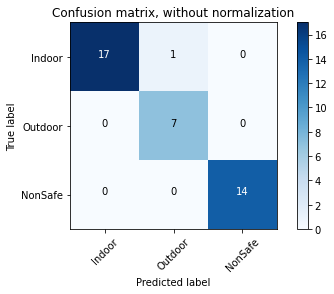

Naive Bayes Classifier Performance Metrics
              precision    recall  f1-score   support

     class 1       0.94      1.00      0.97        17
     class 2       1.00      0.88      0.93         8
     class 3       1.00      1.00      1.00        14

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Precision:  [0.94 1.   1.  ]
Recall:  [1.   0.88 1.  ]
Accuracy:  0.9743589743589743


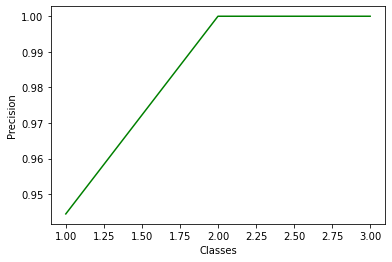

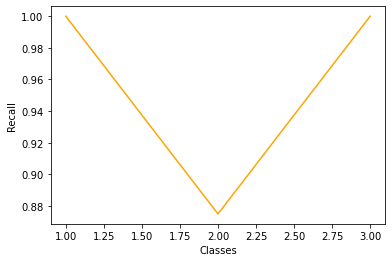

In [4]:
from __future__ import division, print_function
from sklearn.naive_bayes import GaussianNB,MultinomialNB

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import csv
import scikitplot as skplt
from sklearn import preprocessing

from pylab import scatter,show,plot
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_score,recall_score,accuracy_score

sam = pd.read_csv("C:/Users/user/Downloads/rbm_data.csv")
data = sam

print('KMeans Labelling')
kmeans = KMeans(n_clusters=3).fit(data)
class_labels = kmeans.labels_

data2 = data
idx = 14
data2.insert(loc=idx, column = 'Class', value = class_labels)


#gnb = GaussianNB()
gnb = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(data, class_labels, test_size=0.30, random_state=42)
gnb.fit(X_train,np.ravel(y_train))
y_pred= gnb.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_pred,y_test)
np.set_printoptions(precision=2)

class_names = ['Indoor','Outdoor','NonSafe']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()


target_names = ['class 1', 'class 2','class 3']
graph_cl = [1,2,3]
print('Naive Bayes Classifier Performance Metrics')
print(classification_report(y_test, y_pred, target_names=target_names))
precision = precision_score(y_test, y_pred, average=None)
print('Precision: ',precision)
recall = recall_score(y_test, y_pred, average=None)
print('Recall: ',recall)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

plt.plot(graph_cl,precision,color='g')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.show()

plt.plot(graph_cl,recall,c='orange')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.show()

In [6]:
from __future__ import division, print_function
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import csv
import scikitplot as skplt
from sklearn import preprocessing

from pylab import scatter,show,plot
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_score,recall_score,accuracy_score

sam = pd.read_csv("C:/Users/user/Downloads/data.csv")
data = sam


print('KMeans Labelling')
n_clusters=3
kmeans = KMeans(n_clusters).fit(data)
class_labels = kmeans.labels_


X_train, X_test, y_train, y_test = train_test_split(data, class_labels, test_size=0.30, random_state=42)
#gnb.fit(X_train,np.ravel(y_train))
#print(y_train[1])
#data = np.asarray(data)
#data = data.tolist()
X_train = np.asarray(X_train)
X_train = X_train.tolist()
tr_sam = len(X_train)

y_train = np.asarray(y_train)
y_train = y_train.tolist()

classes = []

if len(classes) == 0:
    for i in range(0,n_clusters):
        classes.append([])

for i in range(0,len(y_train)):
    if y_train[i] == 0:
        classes[0].append(X_train[i])
    elif y_train[i] == 1:
        classes[1].append(X_train[i])
    elif y_train[i] == 2:
        classes[2].append(X_train[i])

print("class 0")
print(classes[0])

prob_class0 = len(classes[0]) / tr_sam
print("P(Class = 0) is ",prob_class0)

print("*****************************************************************")
print("class 1")
print(classes[1])

prob_class1 = len(classes[1]) / tr_sam
print("P(Class = 1) is ",prob_class1)

print("*****************************************************************")
print("class 2")
print(classes[2])

prob_class2 = len(classes[2]) / tr_sam
print("P(Class = 2) is ",prob_class2)
print("*****************************************************************")

#print(len(classes[0][0]))
def freq(buff):
    zeros = 0
    ones = 0
    for i in range(0,len(buff)):
        if buff[i] == 0:
            zeros = zeros+1
        elif buff[i] == 1:
            ones = ones+1
    return zeros,ones

prob_mat1 = [[]]

for k in range(0,len(classes[0][0])):
    buff = []
    for j in range(0,len(classes[0])):
        buff.append(classes[0][j][k])
    #print(buff)
    #print(np.asarray(buff))
    buff = np.asarray(buff)
    buff = np.reshape(buff,(-1,1))
    #print(len(buff))
    zeros,ones = freq(buff)
    prob_zeros_class0 = zeros/len(classes[0])
    prob_ones_class0 = ones/len(classes[0])
    if prob_mat1[0] == []:
        prob_mat1[0].append(prob_zeros_class0)
        prob_mat1[0].append(prob_ones_class0)
    else:
        l = len(prob_mat1)
	prob_mat1.append([])
        nl = l+1
	prob_mat1[nl-1].append(prob_zeros_class0)
        prob_mat1[nl-1].append(prob_ones_class0)

print("Probabilities of Class 0",prob_mat1)

prob_mat2 = [[]]

for k in range(0,len(classes[1][0])):
    buff = []
    for j in range(0,len(classes[1])):
        buff.append(classes[1][j][k])

    buff = np.asarray(buff)
    buff = np.reshape(buff,(-1,1))
    
    zeros,ones = freq(buff)
    prob_zeros_class1 = zeros/len(classes[1])
    prob_ones_class1 = ones/len(classes[1])
    if prob_mat2[0] == []:
        prob_mat2[0].append(prob_zeros_class1)
        prob_mat2[0].append(prob_ones_class1)
    else:
        l = len(prob_mat2)
	prob_mat2.append([])
        nl = l+1
	prob_mat2[nl-1].append(prob_zeros_class1)
        prob_mat2[nl-1].append(prob_ones_class1)

print("\nProbabilities of Class 1",prob_mat2)

prob_mat3 = [[]]

for k in range(0,len(classes[2][0])):
    buff = []
    for j in range(0,len(classes[2])):
        buff.append(classes[2][j][k])

    buff = np.asarray(buff)
    buff = np.reshape(buff,(-1,1))
    
    zeros,ones = freq(buff)
    prob_zeros_class2 = zeros/len(classes[2])
    prob_ones_class2 = ones/len(classes[2])
    if prob_mat3[0] == []:
        prob_mat3[0].append(prob_zeros_class2)
        prob_mat3[0].append(prob_ones_class2)
    else:
        l = len(prob_mat3)
	prob_mat3.append([])
        nl = l+1
	prob_mat3[nl-1].append(prob_zeros_class2)
        prob_mat3[nl-1].append(prob_ones_class2)

print("\nProbabilities of Class 2",prob_mat3)


print("\n Testing")
print("\n New Sample: 0 0 0 0 0 0 0 0 1 0 0 0 1 0")

samp = [0,0,0,0,0,0,0,0,1,0,0,0,1,0]

probofsam_class0 = 1
j = 0
for i in range(0,len(prob_mat1)):
    probofsam_class0 = prob_mat1[i][samp[j]] * probofsam_class0
    j = j+1

print("\nProbability of sample belonging to class: 0 is ",probofsam_class0)

probofsam_class1 = 1
j = 0
for i in range(0,len(prob_mat2)):
    probofsam_class1 = prob_mat2[i][samp[j]] * probofsam_class1
    j = j+1

print("\nProbability of sample belonging to class: 1 is ",probofsam_class1)

probofsam_class2 = 1
j = 0
for i in range(0,len(prob_mat3)):
    probofsam_class2 = prob_mat3[i][samp[j]] * probofsam_class2
    j = j+1

print("\nProbability of sample belonging to class: 2 is ",probofsam_class2)

ch = max(probofsam_class0,probofsam_class1,probofsam_class2)
if ch==probofsam_class0:
    print("\n The given sample belongs to class: ",0)
elif ch==probofsam_class1:
    print("\n The given sample belongs to class: ",1)
elif ch==probofsam_class2:
    print("\n The given sample belongs to class: ",2)

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-6-f0e196bb2790>, line 109)